# Problem 2: Latent Semantic Analysis

Reference: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv('problem2ds.csv')
dt.head(5)

,1,2,3,4,title,6,7,8,9,10,11,12,13,14,15,16,description
0,30131,351992,mozilla,Shawn Smith,Nobody; OK to take it and work on it,9/9/2006 18:53,10/18/2010 22:14,10/18/2010 22:14,feature,open,Fonts in new OS X version of the Pinstripe The...,General,Firefox,NaN,mac,NaN,user-ag mozilla/5 macintosh ppc mac os mach-o ...
1,30132,351993,mozilla,Shawn Smith,Nobody; OK to take it and work on it,9/9/2006 18:59,10/13/2006 16:08,10/13/2006 16:08,feature,fixed,Hover image is missaligned with normal image o...,Search,Firefox,NaN,mac,347454 348633,user-ag mozilla/5 macintosh ppc mac os mach-o ...
2,30133,351994,mozilla,Max Kanat-Alexander,Max Kanat-Alexander,9/9/2006 19:03,9/21/2006 16:19,9/21/2006 16:19,feature,fixed,Messages shouldn't contain HTML characters unl...,Bugzilla-General,Bugzilla,NaN,all,NaN,messag txt tmpl throw error function displai h...
3,30134,351995,mozilla,Matthew (lilmatt) Willis,Matthew (lilmatt) Willis,9/9/2006 19:10,11/30/2006 22:31,11/30/2006 22:31,normal,fixed,No talkback in Mac Sunbird nightlies since Aug 24,General,Calendar,NaN,mac,351722 361992,tree-wid broke talkback mac trunk bug gori det...
4,30135,351996,mozilla,Christian,Nobody; OK to take it and work on it,9/9/2006 19:14,9/18/2006 18:03,9/18/2006 18:03,feature,fixed,Events do not appear in day/week/multiweek vie...,Calendar Views,Calendar,NaN,win,349788,user-ag mozilla/5 window window nt en-gb rv ge...


In [3]:
#We only work with two columns: 'title' and 'description'.
dt=dt[['title', 'description']]
dt.head()

,title,description
0,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o ...
1,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o ...
2,Max Kanat-Alexander,messag txt tmpl throw error function displai h...
3,Matthew (lilmatt) Willis,tree-wid broke talkback mac trunk bug gori det...
4,Nobody; OK to take it and work on it,user-ag mozilla/5 window window nt en-gb rv ge...


In [4]:
dt.shape

(10048, 2)

## 1. Data Preprocessing
### Lowercasing

In [5]:
dt['description']=dt['description'].astype(str)
dt['description']=dt['description'].str.lower()
dt.head()

,title,description
0,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o ...
1,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o ...
2,Max Kanat-Alexander,messag txt tmpl throw error function displai h...
3,Matthew (lilmatt) Willis,tree-wid broke talkback mac trunk bug gori det...
4,Nobody; OK to take it and work on it,user-ag mozilla/5 window window nt en-gb rv ge...


### Remove Punctuations

In [6]:
dt['description']=dt['description'].str.replace("[^a-zA-Z#]", " ", regex=True)
dt.head()

,title,description
0,Nobody; OK to take it and work on it,user ag mozilla macintosh ppc mac os mach o ...
1,Nobody; OK to take it and work on it,user ag mozilla macintosh ppc mac os mach o ...
2,Max Kanat-Alexander,messag txt tmpl throw error function displai h...
3,Matthew (lilmatt) Willis,tree wid broke talkback mac trunk bug gori det...
4,Nobody; OK to take it and work on it,user ag mozilla window window nt en gb rv ge...


### Remove Short-words

In [7]:
dt['description']=dt['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dt.head()

,title,description
0,Nobody; OK to take it and work on it,user mozilla macintosh mach gecko bonecho buil...
1,Nobody; OK to take it and work on it,user mozilla macintosh mach gecko bonecho buil...
2,Max Kanat-Alexander,messag tmpl throw error function displai html ...
3,Matthew (lilmatt) Willis,tree broke talkback trunk gori detail file inf...
4,Nobody; OK to take it and work on it,user mozilla window window gecko firefox build...


### Remove Stopwords

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [9]:
STOPW=set(stopwords.words('english'))
def removestopw(x):
    return " ".join([w for w in str(x).split() if w not in STOPW])
dt['description']=dt['description'].apply(lambda x: removestopw(x))
dt.head()

,title,description
0,Nobody; OK to take it and work on it,user mozilla macintosh mach gecko bonecho buil...
1,Nobody; OK to take it and work on it,user mozilla macintosh mach gecko bonecho buil...
2,Max Kanat-Alexander,messag tmpl throw error function displai html ...
3,Matthew (lilmatt) Willis,tree broke talkback trunk gori detail file inf...
4,Nobody; OK to take it and work on it,user mozilla window window gecko firefox build...


### Stemming

In [10]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
def stemword(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
dt['description']=dt['description'].apply(lambda text: stemword(text))
dt.head()

,title,description
0,Nobody; OK to take it and work on it,user mozilla macintosh mach gecko bonecho buil...
1,Nobody; OK to take it and work on it,user mozilla macintosh mach gecko bonecho buil...
2,Max Kanat-Alexander,messag tmpl throw error function displai html ...
3,Matthew (lilmatt) Willis,tree broke talkback trunk gori detail file inf...
4,Nobody; OK to take it and work on it,user mozilla window window gecko firefox build...


## 2. Document-Term Matrix

In [11]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(stop_words='english', max_features=2000, max_df=0.5, smooth_idf=True)
#The number of terms is constricted to 2,000.

In [12]:
dtmatrix=vector.fit_transform(dt['description'])

## 3. Topic Modelling

In [13]:
from sklearn.decomposition import TruncatedSVD

#Find optimal number of topics using Explained Variance Ratio.
n=[5, 15, 30, 60, 90, 180, 250, 350, 500, 800, 1000]
evr=[]
for x in n:
    svd=TruncatedSVD(n_components=x, algorithm='randomized', n_iter=100)
    svd.fit(dtmatrix)
    evr.append(svd.explained_variance_ratio_.sum())
    print('No of Topics: ', x, ' has Explained Variance Ratio: ',svd.explained_variance_ratio_.sum())

No of Topics:  5  has Explained Variance Ratio:  0.05632439143967146
No of Topics:  15  has Explained Variance Ratio:  0.12025076424663128
No of Topics:  30  has Explained Variance Ratio:  0.18975666428661758
No of Topics:  60  has Explained Variance Ratio:  0.2860649776738323
No of Topics:  90  has Explained Variance Ratio:  0.354981775267078
No of Topics:  180  has Explained Variance Ratio:  0.49559881015452223
No of Topics:  250  has Explained Variance Ratio:  0.5712261973770374
No of Topics:  350  has Explained Variance Ratio:  0.6521588087367245
No of Topics:  500  has Explained Variance Ratio:  0.7405624888031725
No of Topics:  800  has Explained Variance Ratio:  0.8547295389734002
No of Topics:  1000  has Explained Variance Ratio:  0.9035243716655477


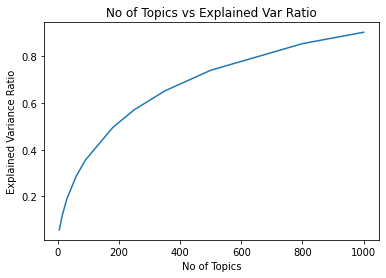

In [14]:
plt.plot(n, evr)
plt.xlabel('No of Topics')
plt.ylabel('Explained Variance Ratio')
plt.title('No of Topics vs Explained Var Ratio')
plt.show()

In [15]:
#Choose 800.
svd_model = TruncatedSVD(n_components=800, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(dtmatrix)

TruncatedSVD(n_components=800, n_iter=100, random_state=122)

In [16]:
#Print out some terms of each topic.
terms=vector.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp=zip(terms, comp)
    sorted_terms=sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    terms=[]
    for t in sorted_terms:
        terms.append(t[0])
    print("Topic ", str(i),": ", terms)

Topic  0 :  ['attach', 'review', 'diff', 'patch', 'comment', 'http', 'file']
Topic  1 :  ['attach', 'diff', 'comment', 'patch', 'file', 'http', 'review']
Topic  2 :  ['diff', 'review', 'file', 'comment', 'http', 'attach', 'patch']
Topic  3 :  ['review', 'http', 'diff', 'comment', 'attach', 'file', 'patch']
Topic  4 :  ['diff', 'attach', 'patch', 'review', 'http', 'file', 'comment']
Topic  5 :  ['patch', 'http', 'diff', 'file', 'review', 'attach', 'comment']
Topic  6 :  ['diff', 'file', 'attach', 'comment', 'http', 'patch', 'review']
Topic  7 :  ['attach', 'review', 'file', 'http', 'diff', 'comment', 'patch']
Topic  8 :  ['file', 'review', 'diff', 'patch', 'attach', 'comment', 'http']
Topic  9 :  ['patch', 'diff', 'file', 'attach', 'comment', 'http', 'review']
Topic  10 :  ['diff', 'http', 'file', 'comment', 'attach', 'patch', 'review']
Topic  11 :  ['review', 'patch', 'http', 'file', 'attach', 'comment', 'diff']
Topic  12 :  ['diff', 'comment', 'patch', 'http', 'review', 'attach', 'fil

Topic  450 :  ['http', 'review', 'attach', 'diff', 'patch', 'comment', 'file']
Topic  451 :  ['review', 'patch', 'attach', 'diff', 'http', 'file', 'comment']
Topic  452 :  ['diff', 'file', 'review', 'http', 'attach', 'patch', 'comment']
Topic  453 :  ['diff', 'comment', 'file', 'review', 'attach', 'http', 'patch']
Topic  454 :  ['patch', 'comment', 'attach', 'diff', 'file', 'http', 'review']
Topic  455 :  ['review', 'http', 'diff', 'attach', 'comment', 'file', 'patch']
Topic  456 :  ['attach', 'comment', 'patch', 'review', 'file', 'diff', 'http']
Topic  457 :  ['file', 'patch', 'attach', 'comment', 'review', 'diff', 'http']
Topic  458 :  ['attach', 'review', 'file', 'comment', 'diff', 'patch', 'http']
Topic  459 :  ['review', 'file', 'patch', 'attach', 'diff', 'comment', 'http']
Topic  460 :  ['http', 'comment', 'file', 'patch', 'diff', 'attach', 'review']
Topic  461 :  ['review', 'comment', 'file', 'diff', 'patch', 'http', 'attach']
Topic  462 :  ['attach', 'review', 'patch', 'file', 

Topic  705 :  ['patch', 'http', 'comment', 'review', 'diff', 'file', 'attach']
Topic  706 :  ['http', 'patch', 'diff', 'attach', 'comment', 'review', 'file']
Topic  707 :  ['review', 'file', 'attach', 'diff', 'patch', 'http', 'comment']
Topic  708 :  ['http', 'file', 'review', 'attach', 'diff', 'patch', 'comment']
Topic  709 :  ['file', 'diff', 'review', 'attach', 'http', 'comment', 'patch']
Topic  710 :  ['comment', 'review', 'file', 'attach', 'http', 'patch', 'diff']
Topic  711 :  ['patch', 'review', 'comment', 'http', 'file', 'diff', 'attach']
Topic  712 :  ['diff', 'attach', 'file', 'comment', 'http', 'patch', 'review']
Topic  713 :  ['attach', 'patch', 'review', 'diff', 'http', 'comment', 'file']
Topic  714 :  ['diff', 'review', 'attach', 'http', 'comment', 'file', 'patch']
Topic  715 :  ['review', 'http', 'diff', 'file', 'comment', 'attach', 'patch']
Topic  716 :  ['http', 'patch', 'attach', 'file', 'review', 'diff', 'comment']
Topic  717 :  ['attach', 'review', 'http', 'file', '